<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/ml15_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN(Artificial Neural Network, 인공 신경망)

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# scikit-learn
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, train_test_split

# tensorflow, keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__  # Google Colab에 설치된 Tensorflow 버전

'2.8.2'

In [ ]:
keras.__version__  # Google Colab의 Keras 버전

'2.8.0'

# Iris 데이터 셋

In [ ]:
data, target = datasets.load_iris(return_X_y=True)

In [ ]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
target[:5]

array([0, 0, 0, 0, 0])

## petal_length, petal_width 변수만 선택한 이진 분류

In [ ]:
X = data[:, 2:].copy()
y = (target != 0).astype('int')

In [ ]:
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## SGD Classifier

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=10,
                    n_jobs=-1, random_state=42)

In [ ]:
sgd.fit(X, y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [ ]:
sgd.coef_

array([[9.29310825, 9.5046378 ]])

In [ ]:
sgd.intercept_

array([-33.65502003])

In [ ]:
pred_prob = sgd.predict_proba(X)
pred_prob[:5]

array([[9.99999993e-01, 7.23930287e-09],
       [9.99999993e-01, 7.23930287e-09],
       [9.99999997e-01, 2.85826298e-09],
       [9.99999982e-01, 1.83354387e-08],
       [9.99999993e-01, 7.23930287e-09]])

In [ ]:
pred = sgd.predict(X)
pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
np.mean(y == pred)

1.0

## Neural Network

In [ ]:
# 신경망 모델 생성
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(2,))],
                         name='iris_binary_single_layer')

In [ ]:
# 신경망 모델 요약 정보: layers, parameters
model.summary()

Model: "iris_binary_single_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 신경망 모델 컴파일: optimizer(훈련 방식), loss(손실 함수), metrics(평가 점수 함수) 설정
model.compile(optimizer='sgd', 
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
# 신경망 훈련
model.fit(X, y, epochs=10, batch_size=1)

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 0.9334 - binary_accuracy: 0.5533
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3913 - binary_accuracy: 0.6667
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3607 - binary_accuracy: 0.6667
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.3343 - binary_accuracy: 0.6867
Epoch 5/10
150/150 [==============================] - 0s 1ms/step - loss: 0.3101 - binary_accuracy: 0.8067
Epoch 6/10
150/150 [==============================] - 0s 1ms/step - loss: 0.2890 - binary_accuracy: 0.8467
Epoch 7/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2700 - binary_accuracy: 0.9333
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.2530 - binary_accuracy: 0.9667
Epoch 9/10
150/150 [==============================] - 0s 1ms/step - loss: 0.2372 - binary_accuracy: 0.9867
Epoch 10/10
150/150 [================

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.38768584],
        [1.4400322 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.3324186], dtype=float32)>]

In [ ]:
pred = model.predict(X)  # 이진 분류에서 predict()는 양성(1)이 될 확률
pred.shape

(150, 1)

In [ ]:
pred[:5]

array([[0.37715253],
       [0.37715253],
       [0.36808977],
       [0.38630205],
       [0.37715253]], dtype=float32)

In [ ]:
# 예측값(0 또는 1)을 계산하기 위해서는 확률 > 0.5 비교해야 함.
pred_label = (pred > 0.5).astype('int').reshape((-1,))
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
np.mean(y == pred_label)  # 정확도: 실젯값과 예측값 비교

0.9866666666666667

## 모든 변수(sl, sw, pl, pw)를 사용한 이진 분류

In [ ]:
X = data.copy()

### SGD

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=10,
                    n_jobs=-1, random_state=42)

In [ ]:
sgd.fit(X, y)

SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [ ]:
sgd.coef_, sgd.intercept_

(array([[ -7.56466569, -26.11029771,  43.43582235,  20.74182528]]),
 array([-14.82209562]))

In [ ]:
pred = sgd.predict(X)  # 예측값(0 또는 1)

In [ ]:
np.mean(y == pred)

1.0

### 신경망

In [ ]:
model = keras.Sequential(layers=[keras.layers.Dense(units=1,
                                                    activation='sigmoid',
                                                    input_shape=(4,))])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.binary_crossentropy,
              metrics=keras.metrics.binary_accuracy)

In [ ]:
model.fit(X, y, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 1s 1ms/step - loss: 0.6307 - binary_accuracy: 0.8733
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1766 - binary_accuracy: 1.0000
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.1237 - binary_accuracy: 1.0000
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0955 - binary_accuracy: 1.0000
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0774 - binary_accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0649 - binary_accuracy: 1.0000
Epoch 7/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0571 - binary_accuracy: 1.0000
Epoch 8/10
150/150 [==============================] - 0s 2ms/step - loss: 0.0506 - binary_accuracy: 1.0000
Epoch 9/10
150/150 [==============================] - 0s 1ms/step - loss: 0.0452 - binary_accuracy: 1.0000
Epoch 10/10
150/150 [================

In [ ]:
# 신경망이 학습 데이터를 훈련하면 가중치들을 찾음.
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.14702998],
        [-1.2266967 ],
        [ 1.1821584 ],
        [ 1.9245535 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-0.05024579], dtype=float32)>]

In [ ]:
pred = model.predict(X)
pred[:5]

array([[0.04506209],
       [0.08234897],
       [0.06036967],
       [0.08539575],
       [0.0406377 ]], dtype=float32)

In [ ]:
pred_label = (pred > 0.5).astype('int').reshape((-1,))
pred_label[:5]

array([0, 0, 0, 0, 0])

In [ ]:
np.mean(y == pred_label)  # 훈련 셋 정확도

1.0

## Iris 다중 클래스 분류

In [ ]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### SGD classifier

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [ ]:
sgd.fit(X=data, y=target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [ ]:
sgd.coef_  # (n_classes, n_features)

array([[   7.32064421,   13.17715959,  -27.57442655,  -12.68911664],
       [  51.85595122, -145.56864647,   40.12103144, -111.8071359 ],
       [-122.62126983, -110.20331528,  189.91857208,  159.89458444]])

In [ ]:
sgd.intercept_

array([   4.97012943,   87.73116955, -122.93221386])

In [ ]:
# 훈련 셋 예측 확률
pred_prob = sgd.predict_proba(X=data)
pred_prob[:5]

array([[1.00000000e+00, 2.34871875e-54, 0.00000000e+00],
       [1.00000000e+00, 2.99578244e-27, 0.00000000e+00],
       [1.00000000e+00, 3.85472447e-46, 0.00000000e+00],
       [1.00000000e+00, 1.38277811e-38, 0.00000000e+00],
       [1.00000000e+00, 6.26310478e-63, 0.00000000e+00]])

In [ ]:
pred_prob[-5:]

array([[4.79904210e-35, 1.80385537e-22, 1.00000000e+00],
       [7.02140712e-35, 5.00000000e-01, 5.00000000e-01],
       [4.99499990e-34, 2.08553589e-12, 1.00000000e+00],
       [9.67207569e-37, 1.55894047e-55, 1.00000000e+00],
       [1.23211445e-33, 5.96727101e-18, 1.00000000e+00]])

In [ ]:
np.argmax(pred_prob, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

In [ ]:
pred_label = sgd.predict(X=data)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.mean(target == pred_label)

0.9333333333333333

### NN

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=3,
                             activation=keras.activations.softmax,
                             input_shape=(4,)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
# optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='...'

In [ ]:
model.fit(x=data, y=target, batch_size=1, epochs=10)

Epoch 1/10
150/150 [==============================] - 1s 2ms/step - loss: 1.4539 - sparse_categorical_accuracy: 0.5667
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 0.6557 - sparse_categorical_accuracy: 0.6667
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 0.5506 - sparse_categorical_accuracy: 0.7067
Epoch 4/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4876 - sparse_categorical_accuracy: 0.7533
Epoch 5/10
150/150 [==============================] - 0s 2ms/step - loss: 0.4641 - sparse_categorical_accuracy: 0.7600
Epoch 6/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4165 - sparse_categorical_accuracy: 0.8267
Epoch 7/10
150/150 [==============================] - 0s 1ms/step - loss: 0.4036 - sparse_categorical_accuracy: 0.8133
Epoch 8/10
150/150 [==============================] - 0s 1ms/step - loss: 0.3932 - sparse_categorical_accuracy: 0.8533
Epoch 9/10
150/150 [============================

In [ ]:
# 신경망 모델이 훈련을 통해서 찾은 가중치: (n_inputs, n_units) & (n_units,)
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 4.6545410e-01,  6.4073646e-01, -5.1051892e-02],
        [ 1.2836115e+00, -5.4555100e-01, -1.2073090e+00],
        [-9.1402417e-01,  5.8312833e-01,  1.6340306e+00],
        [ 9.4282048e-05, -5.7672057e-02,  1.3015144e+00]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.05807034,  0.2930887 , -0.35115913], dtype=float32)>]

In [ ]:
# 다중 클래스 분류 신경망 모델의 predict(): 각 클래스가 될 확률들
pred = model.predict(x=data)

In [ ]:
pred[:5]

array([[9.6007454e-01, 3.9581448e-02, 3.4401825e-04],
       [9.0848923e-01, 9.0256654e-02, 1.2541688e-03],
       [9.4517505e-01, 5.4143619e-02, 6.8138452e-04],
       [9.1507894e-01, 8.3437659e-02, 1.4834446e-03],
       [9.6708685e-01, 3.2628756e-02, 2.8444245e-04]], dtype=float32)

In [ ]:
pred[-5:]

array([[0.00584679, 0.20854285, 0.7856103 ],
       [0.00371969, 0.23416783, 0.7621125 ],
       [0.00730609, 0.25601462, 0.7366793 ],
       [0.00774436, 0.16424213, 0.8280135 ],
       [0.00904167, 0.24839951, 0.7425588 ]], dtype=float32)

In [ ]:
pred.shape  #> 신경망에서 최종 output의 shape

(150, 3)

In [ ]:
pred_label = np.argmax(pred, axis=1)
pred_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.mean(target == pred_label)

0.9266666666666666

# Fashion MNIST datasets

In [ ]:
(X_tr, y_tr), (X_te, y_te) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_tr.shape, y_tr.shape

((60000, 28, 28), (60000,))

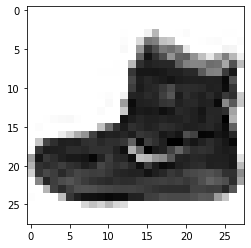

In [ ]:
img = X_tr[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [ ]:
y_tr[0]

9

In [ ]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
X_te.shape, y_te.shape

((10000, 28, 28), (10000,))

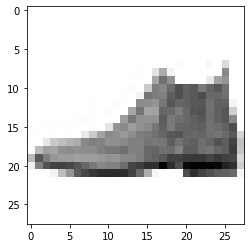

In [ ]:
img = X_te[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [ ]:
y_te[0]

9

In [ ]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
def plot_fashion_mnist(arr, ncols=10):
    n = len(arr)  # arr의 원소의 개수, 샘플 개수.
    nrows = int(np.ceil(n / ncols))  # subplot의 row 개수
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j  # arr에서 샘플의 인덱스
            if nrows == 1 or ncols == 1:  # ax가 1차원 배열인 경우
                if idx < n:
                    ax[idx].imshow(arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:  # ax가 2차원 배열인 경우
                if idx < n:
                    ax[i, j].imshow(arr[idx], cmap=plt.cm.binary)
                ax[i, j].axis('off')
    plt.show()

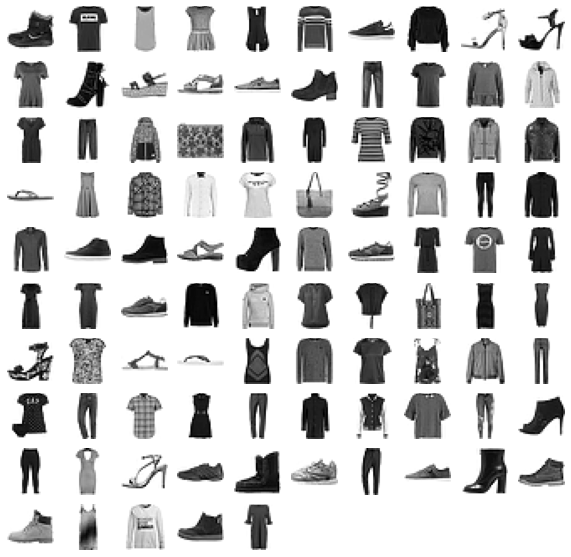

In [ ]:
plot_fashion_mnist(X_tr[:95])

데이터 셋 전처리:

훈련 셋과 테스트 셋은 0 ~ 255 스케일인데, 0 ~ 1 스케일로 변환.

In [ ]:
X_tr_sc = X_tr / 255
X_te_sc = X_te / 255

훈련 셋을 훈련(48,000)/검증(12,000) 셋으로 분리

In [ ]:
tr_data, val_data, tr_target, val_target = train_test_split(X_tr_sc, y_tr,
                                                            test_size=0.2,
                                                            random_state=42,
                                                            stratify=y_tr)

In [ ]:
tr_data.shape

(48000, 28, 28)

In [ ]:
tr_data = tr_data.reshape((48000, -1))    # (48000, 28, 28) -> (48000, 784)
val_data = val_data.reshape((12000, -1))  # (12000, 28, 28) -> (12000, 784)

## SGD classifier

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [ ]:
sgd.fit(tr_data, tr_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, n_jobs=-1, random_state=42)

In [ ]:
# 훈련 결과로 찾은 계수들(coefficients)과 절편들(intercepts)
sgd.coef_.shape, sgd.intercept_.shape
# coefficients: (10, 784)=(n_classes, n_features), intercepts: (10,)=(n_classes,)

((10, 784), (10,))

In [ ]:
# 훈련 셋 예측 확률
tr_pred_prob = sgd.predict_proba(tr_data)
tr_pred_prob[:5]

array([[3.46103829e-03, 1.98675755e-06, 4.82667555e-01, 5.02729471e-05,
        5.48912955e-04, 3.15719188e-12, 5.03987179e-01, 2.65192156e-18,
        9.28305521e-03, 3.96124972e-35],
       [7.55523103e-01, 3.54977754e-05, 3.87606154e-05, 1.08699705e-05,
        5.89136288e-03, 1.79628081e-19, 2.37639589e-01, 9.02758217e-16,
        8.60816116e-04, 2.98418435e-33],
       [7.97566128e-04, 1.45330661e-04, 4.22729884e-04, 9.60294932e-01,
        1.55868192e-06, 2.10671858e-13, 3.83331593e-02, 3.59903550e-06,
        1.12473819e-06, 3.41043524e-27],
       [1.25158255e-02, 1.15572089e-02, 3.29383853e-03, 9.72464894e-01,
        3.91064660e-06, 2.34330697e-08, 1.12412979e-04, 6.58855217e-08,
        5.18206161e-05, 3.69130082e-23],
       [9.55929510e-01, 3.04957677e-07, 2.88578564e-02, 2.67622081e-09,
        3.14834992e-09, 5.39027905e-22, 1.38535303e-02, 3.00496410e-16,
        1.35879227e-03, 6.54101447e-22]])

In [ ]:
tr_pred = sgd.predict(tr_data)
tr_pred[:5]

array([6, 0, 3, 3, 0], dtype=uint8)

In [ ]:
# 훈련 셋에서의 정확도
sgd.score(tr_data, tr_target)

0.8447291666666666

In [ ]:
# 검증 셋에서의 정확도
sgd.score(val_data, val_target)

0.8380833333333333

## Neural Network

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax,
                             input_shape=(784,)))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
model.fit(tr_data, tr_target, epochs=10)
# batch_size=None일 때, batch_size의 기본값은 32
# -> 한 번의 epoch에서 반복하는 횟수는 48_000 / 32 = 1_500

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8705 - sparse_categorical_accuracy: 0.7244
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6168 - sparse_categorical_accuracy: 0.7992
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5630 - sparse_categorical_accuracy: 0.8146
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5340 - sparse_categorical_accuracy: 0.8236
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5158 - sparse_categorical_accuracy: 0.8286
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5019 - sparse_categorical_accuracy: 0.8324
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4913 - sparse_categorical_accuracy: 0.8356
Epoch 8/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4827 - sparse_categorical_accuracy: 0.8388
Epoch 9/10
1500/1500 [==========

In [ ]:
model.weights[0].shape

TensorShape([784, 10])

In [ ]:
model.weights[1].shape

TensorShape([10])

In [ ]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 2s 1ms/step - loss: 0.4707 - sparse_categorical_accuracy: 0.8411


[0.47066929936408997, 0.8410624861717224]

In [ ]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4611 - sparse_categorical_accuracy: 0.8437


[0.4611171782016754, 0.843666672706604]

## Deep Neural Network(심층 신경망)

Deep learing: DNN을 훈련시키는 머신 러닝 학습 방법.

layer를 2개 이상 연결하는 신경망을 만들 경우:
*   첫번째 layer에서만 input_shape을 지정하면 됨.
    *   두번째 layer부터는 그 이전 layer의 출력의 개수(unit의 개수)가 input_shape으로 자동 계산됨.
*   마지막 layer(출력층)를 제외한 중간 layer들의 units, activation 파라미터는 훈련을 통해서 최적의 값을 찾아야 하는 하이퍼 파라미터.
*   출력층의 units, activation 파라미터는 문제에 따라서 결정됨.
    *   이진 분류: `units=1`, `activation='sigmoid'`
    *   다중 클래스 분류: `units=n_classes`, `activation='softmax'`

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=100, 
                             activation=keras.activations.sigmoid,
                             input_shape=(784,)))
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
model.fit(tr_data, tr_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4032 - sparse_categorical_accuracy: 0.6374
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8534 - sparse_categorical_accuracy: 0.7432
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7176 - sparse_categorical_accuracy: 0.7615
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6516 - sparse_categorical_accuracy: 0.7775
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6091 - sparse_categorical_accuracy: 0.7903
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5782 - sparse_categorical_accuracy: 0.8018
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5545 - sparse_categorical_accuracy: 0.8099
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5358 - sparse_categorical_accuracy: 0.8157
Epoch 9/10
1500/1500 [==========

In [ ]:
model.weights[0].shape, model.weights[1].shape

(TensorShape([784, 100]), TensorShape([100]))

In [ ]:
model.weights[2].shape, model.weights[3].shape

(TensorShape([100, 10]), TensorShape([10]))

In [ ]:
# 훈련 셋에서의 손실(cross entropy)과 정확도
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 2s 2ms/step - loss: 0.5010 - sparse_categorical_accuracy: 0.8269


[0.500991702079773, 0.8268749713897705]

In [ ]:
# 검증 셋에서의 손실과 정확도
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4902 - sparse_categorical_accuracy: 0.8298


[0.49023672938346863, 0.8298333287239075]

# Activation Function(활성화 함수)

## sigmoid(logistic) 함수

$
\sigma (x) = \dfrac{1}{1 + \exp(-x)}
$

In [ ]:
xvals = np.arange(-5, 5, 0.0001)

In [ ]:
# keras.activations.sigmoid()
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

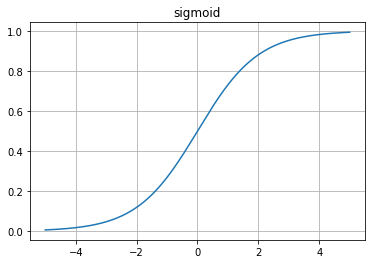

In [ ]:
yvals = sigmoid(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('sigmoid')
plt.show()

## Hybolic tangent

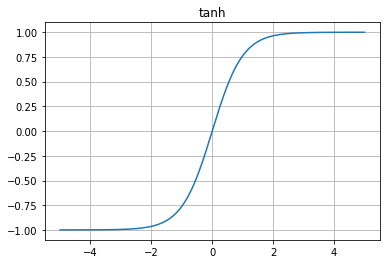

In [ ]:
yvals = np.tanh(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('tanh')
plt.show()

## ReLU(Rectified Linear Unit)

$
\text{ReLU} (x) = 
\begin{cases}
    x & \text{for } x \ge 0 \\
    0 & \text{otherwise}
\end{cases}
$

In [ ]:
# keras.activations.relu()
def relu(x):
    return np.maximum(x, 0)

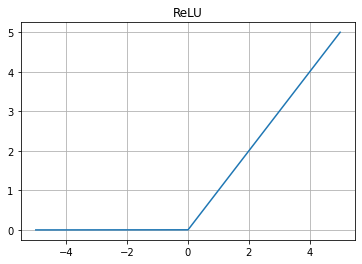

In [ ]:
yvals = relu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('ReLU')
plt.show()

## Leaky ReLU

$
\text{LeakyReLU} (x, \alpha) = 
\begin{cases}
    x & \text{for } x \ge 0 \\
    \alpha x & \text{otherwise}
\end{cases}
$

In [ ]:
# keras.activations.relu(x, alpha)
def leaky_relu(x, alpha=0.01):
    return np.maximum(x, alpha * x)

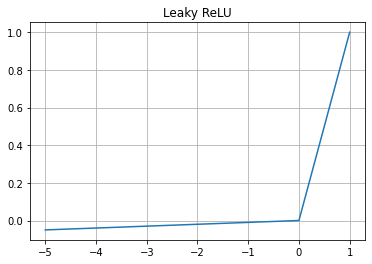

In [ ]:
xvals = np.arange(-5, 2)
yvals = leaky_relu(xvals, alpha=0.01)
plt.plot(xvals, yvals)
plt.grid()
plt.title('Leaky ReLU')
plt.show()

## ELU(Exponential Linear Unit)

$
\text{ELU} (x, \alpha) =
\begin{cases}
    x & \text{for } x \ge 0 \\
    \alpha (\exp(x) - 1) & \text{otherwise}
\end{cases}
$

In [ ]:
# keras.activations.elu()
def elu(arr, alpha=1):
    return np.array([x if x > 0 else alpha * (np.exp(x) - 1) 
                     for x in arr])

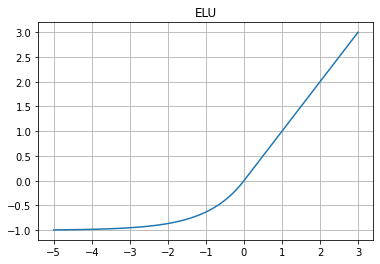

In [ ]:
xvals = np.arange(-5, 3, 0.001)
yvals = elu(xvals)
plt.plot(xvals, yvals)
plt.grid()
plt.title('ELU')
plt.show()

Activation 함수 적용: ELU -> Leaky ReLU -> ReLU -> logistic(sigmoid)

## MNIST dataset

In [ ]:
(X_tr, y_tr), (X_te, y_te) = keras.datasets.fashion_mnist.load_data()

In [ ]:
X_tr.shape, X_te.shape  # 데이터 - 3차원 배열 (n_samples, height, width)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# 0 ~ 255 스케일을 0 ~ 1 스케일로 변환
X_tr_sc = X_tr / 255
X_te_sc = X_te / 255

In [ ]:
tr_data, val_data, tr_target, val_target = train_test_split(X_tr_sc, y_tr,
                                                            test_size=0.2,
                                                            random_state=42,
                                                            stratify=y_tr)

In [ ]:
tr_data.shape, val_data.shape

((48000, 28, 28), (12000, 28, 28))

## 첫번째 layer 활성화함수: ELU

In [ ]:
model = keras.Sequential()
# (28, 28) 모양의 2차원 배열을 (28*28,) 모양의 1차원 배열로 변환하는 레이어.
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# hidden layer(은닉층)
model.add(keras.layers.Dense(units=100,
                             activation=keras.activations.elu))
# output layer(출력층)
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
# 모델 요약 정보 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7533 - sparse_categorical_accuracy: 0.7519
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5294 - sparse_categorical_accuracy: 0.8202
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4872 - sparse_categorical_accuracy: 0.8330
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4636 - sparse_categorical_accuracy: 0.8380
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4487 - sparse_categorical_accuracy: 0.8434


In [ ]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4380 - sparse_categorical_accuracy: 0.8479


[0.4379878640174866, 0.8479375243186951]

In [ ]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4320 - sparse_categorical_accuracy: 0.8502


[0.4320092797279358, 0.8501666784286499]

## 첫번째 layer 활성화 함수: Leaky ReLU

In [ ]:
model = keras.Sequential()
# Flatten layer
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# Hidden layer
model.add(keras.layers.Dense(units=100))
# Leaky Layer (activation) layer
model.add(keras.layers.LeakyReLU())
# Output layer
model.add(keras.layers.Dense(units=10,
                             activation=keras.activations.softmax))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7768 - sparse_categorical_accuracy: 0.7426
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5428 - sparse_categorical_accuracy: 0.8155
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4954 - sparse_categorical_accuracy: 0.8292
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4712 - sparse_categorical_accuracy: 0.8377
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4540 - sparse_categorical_accuracy: 0.8427


In [ ]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.4407 - sparse_categorical_accuracy: 0.8476


[0.4407063126564026, 0.8475833535194397]

In [ ]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4357 - sparse_categorical_accuracy: 0.8510


[0.43573206663131714, 0.8510000109672546]

# Optimizers

손실(비용, 목적) 함수를 최적화하는 알고리즘.

*   SGD -> Momentum (속도 증가) -> Nesterov (가속도 증가)
*   적응형 학습율(adaptive learning rate): RMSProp, Adam(Adaptive Momentum), Nadam, AdaGrad, ...

In [ ]:
# Flatten -> Hidden(100, ELU) -> Output(10, softmax)
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(units=100,
                                 activation=keras.activations.elu))
    model.add(keras.layers.Dense(units=10,
                                 activation=keras.activations.softmax))
    return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## RMSProp

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5332 - sparse_categorical_accuracy: 0.8100
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4001 - sparse_categorical_accuracy: 0.8555
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3619 - sparse_categorical_accuracy: 0.8683
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3378 - sparse_categorical_accuracy: 0.8761
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3211 - sparse_categorical_accuracy: 0.8823


In [ ]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.3100 - sparse_categorical_accuracy: 0.8851


[0.3099607527256012, 0.8851458430290222]

In [ ]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3467 - sparse_categorical_accuracy: 0.8762


[0.3466680645942688, 0.8761666417121887]

## Adam

In [ ]:
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
model.fit(tr_data, tr_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5152 - sparse_categorical_accuracy: 0.8190
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3927 - sparse_categorical_accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3540 - sparse_categorical_accuracy: 0.8706
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3286 - sparse_categorical_accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3097 - sparse_categorical_accuracy: 0.8861


In [ ]:
model.evaluate(tr_data, tr_target)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.2781 - sparse_categorical_accuracy: 0.8972


[0.2780531644821167, 0.8971874713897705]

In [ ]:
model.evaluate(val_data, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3182 - sparse_categorical_accuracy: 0.8852


[0.31816887855529785, 0.8851666450500488]

## 훈련 epoch 횟수에 따른 평가(손실, 정확도)

In [ ]:
model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
history = model.fit(x=tr_data, y=tr_target, epochs=20,
                    validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5329 - sparse_categorical_accuracy: 0.8116 - val_loss: 0.4185 - val_sparse_categorical_accuracy: 0.8482
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4014 - sparse_categorical_accuracy: 0.8551 - val_loss: 0.3875 - val_sparse_categorical_accuracy: 0.8603
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3637 - sparse_categorical_accuracy: 0.8687 - val_loss: 0.3637 - val_sparse_categorical_accuracy: 0.8706
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3408 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.3520 - val_sparse_categorical_accuracy: 0.8740
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3233 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.3658 - val_sparse_categorical_accuracy: 0.8694
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3116 - spars

In [ ]:
type(history)

keras.callbacks.History

In [ ]:
type(history.history)  # History 객체의 history 속성(property)

dict

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

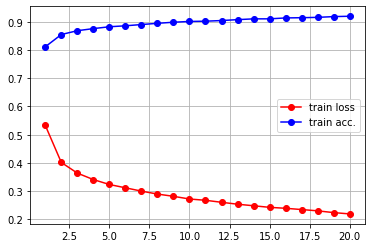

In [ ]:
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 크로스 엔트로피
train_loss = history.history['loss']
# 신경망 모델이 epoch 마다 계산한 훈련 셋에서의 정확도
train_acc = history.history['sparse_categorical_accuracy']

# 훈련 셋 학습 곡선
epochs = np.arange(1, 21)
plt.plot(epochs, train_loss, 'ro-', label='train loss')
plt.plot(epochs, train_acc, 'bo-', label='train acc.')
plt.grid()
plt.legend()
plt.show()

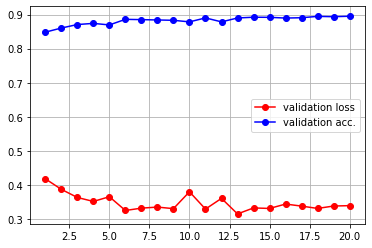

In [ ]:
# 신경망 모델이 epoch 마다 계산한 검증 셋에서의 손실
val_loss = history.history['val_loss']
# 신경망 모델이 epoch 마다 계산한 검증 셋에서의 정확도
val_acc = history.history['val_sparse_categorical_accuracy']

# 검증 셋의 학습 곡선
plt.plot(epochs, val_loss, 'ro-', label='validation loss')
plt.plot(epochs, val_acc, 'bo-', label='validation acc.')
plt.grid()
plt.legend()
plt.show()

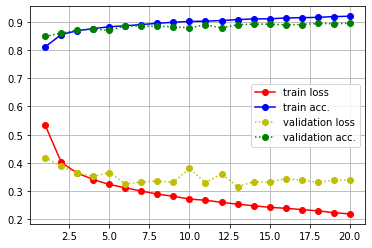

In [ ]:
plt.plot(epochs, train_loss, 'ro-', label='train loss')
plt.plot(epochs, train_acc, 'bo-', label='train acc.')

plt.plot(epochs, val_loss, 'yo:', label='validation loss')
plt.plot(epochs, val_acc, 'go:', label='validation acc.')

plt.grid()
plt.legend()
plt.show()

# 규제: Dropout

In [ ]:
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
result_non_dropout = model.fit(x=tr_data, y=tr_target, epochs=20,
                               validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5206 - sparse_categorical_accuracy: 0.8157 - val_loss: 0.4055 - val_sparse_categorical_accuracy: 0.8567
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3961 - sparse_categorical_accuracy: 0.8581 - val_loss: 0.3944 - val_sparse_categorical_accuracy: 0.8528
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3569 - sparse_categorical_accuracy: 0.8692 - val_loss: 0.3623 - val_sparse_categorical_accuracy: 0.8702
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3305 - sparse_categorical_accuracy: 0.8780 - val_loss: 0.3277 - val_sparse_categorical_accuracy: 0.8814
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8847 - val_loss: 0.3330 - val_sparse_categorical_accuracy: 0.8824
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2945 - spars

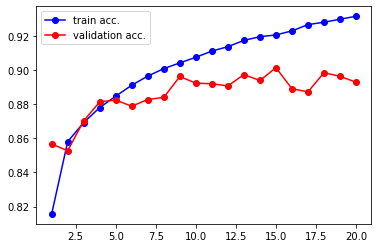

In [ ]:
# epoch 변화에 따른 정확도 곡선
train_acc = result_non_dropout.history['sparse_categorical_accuracy']
val_acc = result_non_dropout.history['val_sparse_categorical_accuracy']

plt.plot(epochs, train_acc, 'bo-', label='train acc.')
plt.plot(epochs, val_acc, 'ro-', label='validation acc.')
plt.legend()
plt.show()

In [ ]:
def build_dropout_model():
    model = keras.Sequential()
    # flatten layer
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    # hidden layer
    model.add(keras.layers.Dense(units=100, 
                                 activation=keras.activations.elu))
    # drop out layer
    model.add(keras.layers.Dropout(rate=0.3))
    # output layer
    model.add(keras.layers.Dense(units=10,
                                 activation=keras.activations.softmax))
    return model

In [ ]:
model = build_dropout_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
result_dropout = model.fit(x=tr_data, y=tr_target, epochs=20,
                           validation_data=(val_data, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5737 - sparse_categorical_accuracy: 0.7976 - val_loss: 0.4369 - val_sparse_categorical_accuracy: 0.8397
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4500 - sparse_categorical_accuracy: 0.8369 - val_loss: 0.3832 - val_sparse_categorical_accuracy: 0.8624
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4144 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.3681 - val_sparse_categorical_accuracy: 0.8662
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3938 - sparse_categorical_accuracy: 0.8554 - val_loss: 0.3501 - val_sparse_categorical_accuracy: 0.8738
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3778 - sparse_categorical_accuracy: 0.8611 - val_loss: 0.3498 - val_sparse_categorical_accuracy: 0.8746
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3652 - spars

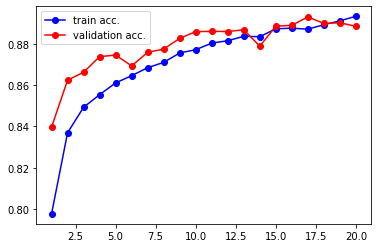

In [ ]:
train_acc = result_dropout.history['sparse_categorical_accuracy']
val_acc = result_dropout.history['val_sparse_categorical_accuracy']

plt.plot(epochs, train_acc, 'bo-', label='train acc.')
plt.plot(epochs, val_acc, 'ro-', label='validation acc.')
plt.legend()
plt.show()

# 훈련된 모델 저장과 복원

Colab 세션에 저장하면, 세션이 만료됐을 때 저장된 파일은 삭제됨.

Google Drive를 마운트해서 저장하는 게 더 좋음.

In [ ]:
# 훈련된 모델의 파라미터들만 저장
model.save_weights('dropout_model_weights.h5')

In [ ]:
# 훈련된 모델을 저장
model.save('dropout_model.h5')

파라미터만 저장된 파일에서 모델을 복원하려면, 저장 당시의 모델과 동일한 모델을 먼저 생성한 후 파라미터를 load하면 됨.

In [ ]:
model2 = build_dropout_model()  # 파라미터 저장과 동일한 모델 생성
model2.load_weights('dropout_model_weights.h5')  # 생성된 모델에서 파라미터들을 로드.

파라미터들만 로드한 경우에는 optimizer, loss, metrics 등이 compile되지 않은 상태이기 때문에 evaluate를 호출할 수는 없음.

하지만, 훈련된 파라미터가 있기 때문에 predict는 가능함.

In [ ]:
pred_prob = model2.predict(x=val_data)  # 각 레이블이 될 확률
pred_label = np.argmax(pred_prob, axis=1)  # 예측 값
np.mean(val_target == pred_label)  # 정확도

0.8885

저장된 모델을 로드하는 경우:

In [ ]:
model3 = keras.models.load_model('dropout_model.h5')

In [ ]:
model3.evaluate(x=val_data, y=val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3170 - sparse_categorical_accuracy: 0.8885


[0.3169572651386261, 0.8884999752044678]

# Early Stopping(조기 종료) Callback

In [ ]:
model = build_dropout_model()
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
result = model.fit(x=tr_data, y=tr_target, epochs=100,
                   callbacks=[checkpoint_cb, early_stop_cb],
                   validation_data=(val_data, val_target))

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5739 - sparse_categorical_accuracy: 0.7983 - val_loss: 0.4328 - val_sparse_categorical_accuracy: 0.8462
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4500 - sparse_categorical_accuracy: 0.8388 - val_loss: 0.3967 - val_sparse_categorical_accuracy: 0.8575
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4159 - sparse_categorical_accuracy: 0.8493 - val_loss: 0.3677 - val_sparse_categorical_accuracy: 0.8697
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3974 - sparse_categorical_accuracy: 0.8546 - val_loss: 0.3519 - val_sparse_categorical_accuracy: 0.8723
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3771 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3673 - val_sparse_categorical_accuracy: 0.8667
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3672 -

In [ ]:
early_stop_cb.stopped_epoch

16

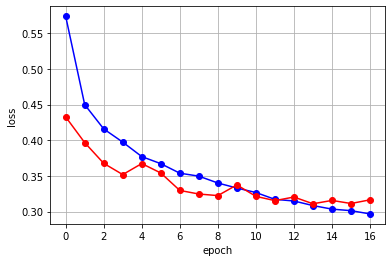

In [ ]:
train_loss = result.history['loss']
val_loss = result.history['val_loss']

plt.plot(train_loss, 'bo-', label='train loss')
plt.plot(val_loss, 'ro-', label='validation loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()